In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler



In [2]:
df=pd.read_csv('/content/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

In [3]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [4]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [6]:
df['class'].value_counts()

,count
class,
GALAXY,4998
STAR,4152
QSO,850


objid and specobjid are just identifiers and 'run', 'rerun', 'camcol' and 'field' are values which describe parts of the camera at the moment when making the observation,



In [7]:
df.drop(['objid', 'run', 'rerun', 'camcol', 'field', 'specobjid'], axis=1, inplace=True)

In [8]:
df.head()

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,STAR,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,GALAXY,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,STAR,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,STAR,0.000590,3306,54922,512


MOST IMPORTANT / NECESSARY FEATURES

These are the core features that carry classification signal:

 Photometric Magnitudes: u, g, r, i, z

These are the brightness in 5 color filters.

Why important?

Colors (u−g, g−r, etc.) separate:

Stars (specific color patterns)

Galaxies (redder)

Quasars (bluer UV)

These features alone can reach 92–96% accuracy.

redshift

This is crucial:

Stars → ~0

Galaxies → small–medium redshift

Quasars → large redshift

This feature alone often separates stars cleanly.

 Moderately useful (optional)

These do not strongly separate classes but may help slightly:

◻ ra, dec

Sky coordinates (position).
Not based on physics — classification doesn’t depend on where it is in the sky.

Sometimes helps identify survey patterns, but mostly not needed.

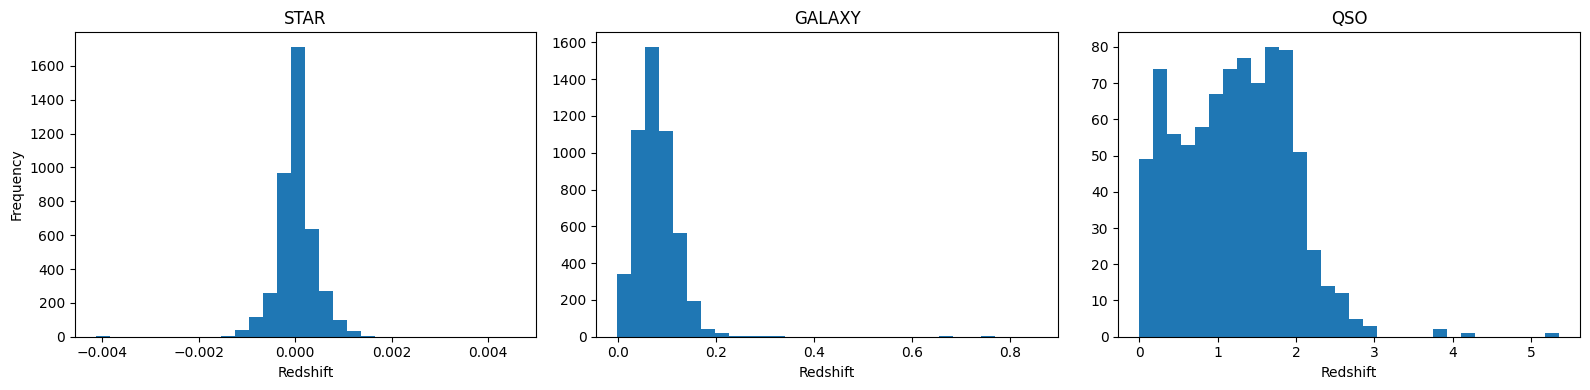

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# STAR
axes[0].hist(df[df['class'] == 'STAR']['redshift'], bins=30)
axes[0].set_title('STAR')
axes[0].set_xlabel('Redshift')
axes[0].set_ylabel('Frequency')

# GALAXY
axes[1].hist(df[df['class'] == 'GALAXY']['redshift'], bins=30)
axes[1].set_title('GALAXY')
axes[1].set_xlabel('Redshift')

# QSO
axes[2].hist(df[df['class'] == 'QSO']['redshift'], bins=30)
axes[2].set_title('QSO')
axes[2].set_xlabel('Redshift')

plt.tight_layout()
plt.show()

Class	Typical color behavior
Star	Moderate u-g, g-r values
Galaxy	Redder g-r, r-i (older stars/dust)
Quasar	Bluer u-g (strong UV emission)


u, g, r, i, z are correlated:

Nearby bands tend to increase/decrease together (if an object is bright in r, it’s usually bright in i and z).

In [10]:
df_fe=df
le=LabelEncoder()
df_fe['class']=le.fit_transform(df_fe['class'])

In [11]:
df_fe

,ra,dec,u,g,r,i,z,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,2,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,0,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,0,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,2,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,0,0.014019,447,51877,229


In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_fe[['u', 'g', 'r', 'i', 'z']])
df_fe=pd.concat([df_fe, pd.DataFrame(df_pca, columns=['PC1', 'PC2', 'PC3'])], axis=1)

In [13]:
df_fe.drop(['u', 'g', 'r', 'i', 'z'], axis=1, inplace=True)

In [14]:
df_fe

,ra,dec,class,redshift,plate,mjd,fiberid,PC1,PC2,PC3
0,183.531326,0.089693,2,-0.000009,3306,54922,491,-1.507202,1.377293,-0.265119
1,183.598370,0.135285,2,-0.000055,323,51615,541,-0.195758,0.028410,-0.155695
2,183.680207,0.126185,0,0.123111,287,52023,513,1.297604,0.590023,0.140338
3,183.870529,0.049911,2,-0.000111,3306,54922,510,-1.446117,-0.566685,-0.009272
4,183.883288,0.102557,2,0.000590,3306,54922,512,-0.849271,-1.287505,-0.397689
...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,0,0.027583,447,51877,246,0.222959,0.134301,-0.057857
9996,131.306083,51.671341,0,0.117772,447,51877,228,0.259171,-0.415333,0.158501
9997,131.552562,51.666986,2,-0.000402,7303,57013,622,1.480725,-0.388717,-0.126646
9998,131.477151,51.753068,0,0.014019,447,51877,229,1.392088,-0.117004,0.038818


In [15]:
scaler = MinMaxScaler()
sdss = scaler.fit_transform(df_fe.drop('class', axis=1))

KNN


In [16]:
X_train,X_test,y_train,y_test= train_test_split(sdss,df_fe['class'],test_size=0.2)

In [17]:
X_train.size

72000

In [18]:
X_test.size

18000

In [19]:
y_test.size

2000

In [20]:
y_train.size

8000

KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier
import time


In [22]:
knn=KNeighborsClassifier(n_neighbors=5)
start= time.perf_counter()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [23]:
end=time.perf_counter()
y_pred=knn.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score
acc_knn=accuracy_score(y_test,y_pred)
acc_knn = round(acc_knn, 2)

In [25]:
print("prediction by KNN is",acc_knn*100,"Percent accurate" )

prediction by KNN is 93.0 Percent accurate


In [26]:
elapsed = end - start

print("Time taken by KNN is: %3.2f seconds" % elapsed)

Time taken by KNN is: 0.25 seconds


NAIVE BAYES


In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MaxAbsScaler



In [31]:
scaler_gnb = MaxAbsScaler()
sdss = scaler_gnb.fit_transform(df_fe.drop('class', axis=1))
X_train_gnb, X_test_gnb, y_train_gnb, y_test_gnb = train_test_split(sdss, df_fe['class'], test_size=0.33)


In [38]:
gnb = GaussianNB()
training_start = time.perf_counter()
gnb.fit(X_train_gnb, y_train_gnb)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = gnb.predict(X_test_gnb)
prediction_end = time.perf_counter()
acc_gnb = accuracy_score(y_test_gnb, preds)
acc_gnb = round(acc_gnb, 2)
gnb_train_time = training_end-training_start
gnb_prediction_time = prediction_end-prediction_start
print("Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: %3.2f" % (acc_gnb))
print("Time consumed for training: %4.3f seconds" % (gnb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (gnb_prediction_time))

Scikit-Learn's Gaussian Naive Bayes Classifier's prediction accuracy is: 0.98
Time consumed for training: 0.008 seconds
Time consumed for prediction: 0.00163 seconds


Random Forest Classifier


In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rfc=RandomForestClassifier(n_estimators=100)
training_start = time.perf_counter()
rfc.fit(X_train,y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
y_pred=rfc.predict(X_test)
prediction_end = time.perf_counter()

In [48]:
acc_rfc=accuracy_score(y_test,y_pred)
acc_rfc= round(acc_rfc, 2)

In [42]:
print("Scikit-Learn's Random Forest Classifier's prediction accuracy is: %3.2f" % (acc*100))
print("Time consumed for training: %4.3f seconds" % (training_end-training_start))
print("Time consumed for prediction: %6.5f seconds" % (prediction_end-prediction_start))

Scikit-Learn's Random Forest Classifier's prediction accuracy is: 99.00
Time consumed for training: 3.099 seconds
Time consumed for prediction: 0.02281 seconds


XGBOOST


In [43]:
xgb=XGBClassifier(n_estimators=100)


In [44]:
training_start = time.perf_counter()
xgb.fit(X_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds = xgb.predict(X_test)
prediction_end = time.perf_counter()

In [45]:
acc_xgb = accuracy_score(y_test, preds)
acc_xgb = round(acc_xgb, 2)
xgb_train_time = training_end-training_start
xgb_prediction_time = prediction_end-prediction_start

In [47]:
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb*100))
print("Time consumed for training: %4.3f seconds" % (xgb_train_time))
print("Time consumed for prediction: %6.5f seconds" % (xgb_prediction_time))

XGBoost's prediction accuracy is: 99.00
Time consumed for training: 0.979 seconds
Time consumed for prediction: 0.03678 seconds


In [ ]:

X = df[['ra','dec','u','g','r','i','z','redshift']]
y = df['class']

# Encode class
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = XGBClassifier(n_estimators=100)
model.fit(X_train, y_train)

preds = model.predict(X_test)
print("Model Accuracy: %.2f%%" % (accuracy_score(y_test, preds)*100))


print("\nEnter Astronomical Object Details:")

ra = float(input("Right Ascension (ra): "))
dec = float(input("Declination (dec): "))
u  = float(input("Magnitude u: "))
g  = float(input("Magnitude g: "))
r  = float(input("Magnitude r: "))
i  = float(input("Magnitude i: "))
z  = float(input("Magnitude z: "))
redshift = float(input("Redshift value: "))

# Create user_df
user_df = pd.DataFrame([[ra,dec,u,g,r,i,z,redshift]],
                       columns=['ra','dec','u','g','r','i','z','redshift'])

# Scale user input
user_scaled = scaler.transform(user_df)


prediction = model.predict(user_scaled)
class_name = le.inverse_transform(prediction)

print("\nPredicted Class:", class_name[0])


Model Accuracy: 99.20%

Enter Astronomical Object Details:
